## Case 3: Процесс электронно-лучевой сварки
Выпускной проект по курсу: Аналитик данных МГТУ им. Н.Э. Баумана 

Группа: AD11902/1

Слушатель: Русаков Глеб Игоревич

Задача: определить значение глубины и ширины сварочного шва электронно-лучевой сварки.\
Регрессия.

Целевые переменные: 

* Depth - глубина шва
* Width - ширина шва

Используемые признаки: 

* IW - величина сварочного тока
* IF - ток фокусировки электронного пучка
* VW - скорость сварки
* FP - расстояние от поверхности образцов до электронно-оптической системы 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats

Загрузка датасета

In [2]:
data_orig = pd.read_csv('ebw_data.csv')

Анализ данных

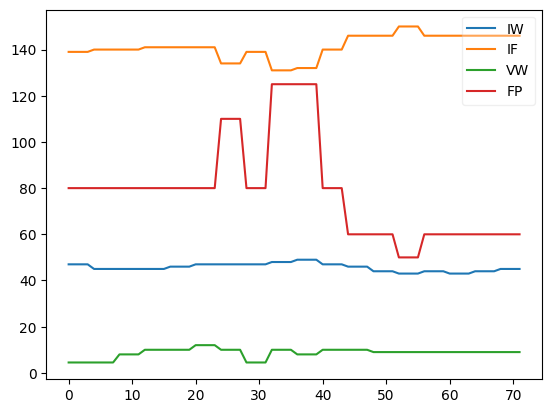

In [3]:
data_orig[['IW', 'IF', 'VW', 'FP']].plot()
plt.legend(loc='upper right',framealpha=0.3)

In [4]:
data_orig.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


Проверка пропусков

In [5]:
data_orig.isnull().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [6]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


Описательная статистика

In [7]:
data_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,72.0,45.666667,1.678363,43.00,44.00,45.50,47.00,49.00
IF,72.0,141.333333,5.145763,131.00,139.00,141.00,146.00,150.00
VW,72.0,8.638889,2.061078,4.50,8.00,9.00,10.00,12.00
FP,72.0,78.333333,21.493530,50.00,60.00,80.00,80.00,125.00
Depth,72.0,1.195556,0.225081,0.80,1.08,1.20,1.29,1.76
Width,72.0,1.970417,0.279040,1.68,1.76,1.84,2.05,2.60


Поиск дубликатов

In [8]:
data_orig.nunique()

IW        7
IF        8
VW        5
FP        5
Depth    29
Width    25
dtype: int64

In [9]:
data_orig.duplicated().sum()

7

In [10]:
duplicate_data = data_orig[data_orig.duplicated()]
duplicate_data

,IW,IF,VW,FP,Depth,Width
11,45,140,8.0,80,1.20,1.96
31,47,139,4.5,80,1.36,2.48
46,46,146,10.0,60,1.36,1.76
54,43,150,9.0,50,1.08,1.82
55,43,150,9.0,50,1.08,1.82
59,44,146,9.0,60,1.20,1.76
70,45,146,9.0,60,1.28,1.76


Проверка пропусков

In [11]:
data_orig.isnull().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

Удаление дубликатов

In [12]:
data_orig_deduplicated = data_orig.drop_duplicates()

Анализ после удаления дубликатов

In [13]:
data_orig_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      65 non-null     int64  
 1   IF      65 non-null     int64  
 2   VW      65 non-null     float64
 3   FP      65 non-null     int64  
 4   Depth   65 non-null     float64
 5   Width   65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.6 KB


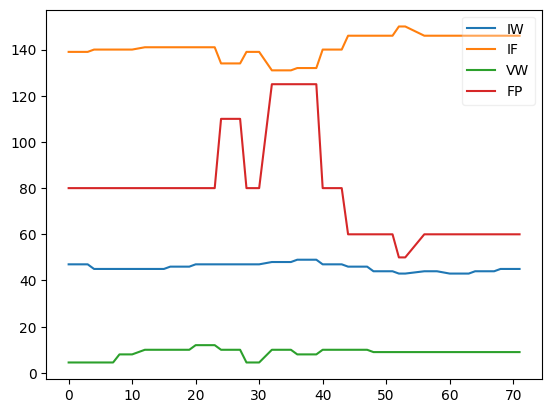

In [14]:
data_orig_deduplicated[['IW', 'IF', 'VW', 'FP']].plot()
plt.legend(loc='upper right', framealpha=0.3)

In [15]:
data_orig_deduplicated.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,65.0,45.769231,1.674900,43.00,44.00,46.00,47.00,49.00
IF,65.0,140.907692,5.070512,131.00,139.00,141.00,146.00,150.00
VW,65.0,8.669231,2.097761,4.50,8.00,9.00,10.00,12.00
FP,65.0,80.000000,21.650635,50.00,60.00,80.00,80.00,125.00
Depth,65.0,1.192615,0.234136,0.80,1.04,1.20,1.28,1.76
Width,65.0,1.977077,0.281945,1.68,1.78,1.84,2.08,2.60


Убедимся, что все дубликаты удалены

In [16]:
data_orig_deduplicated.duplicated().sum()

0

Попарная зависимость переменных и гистограммы

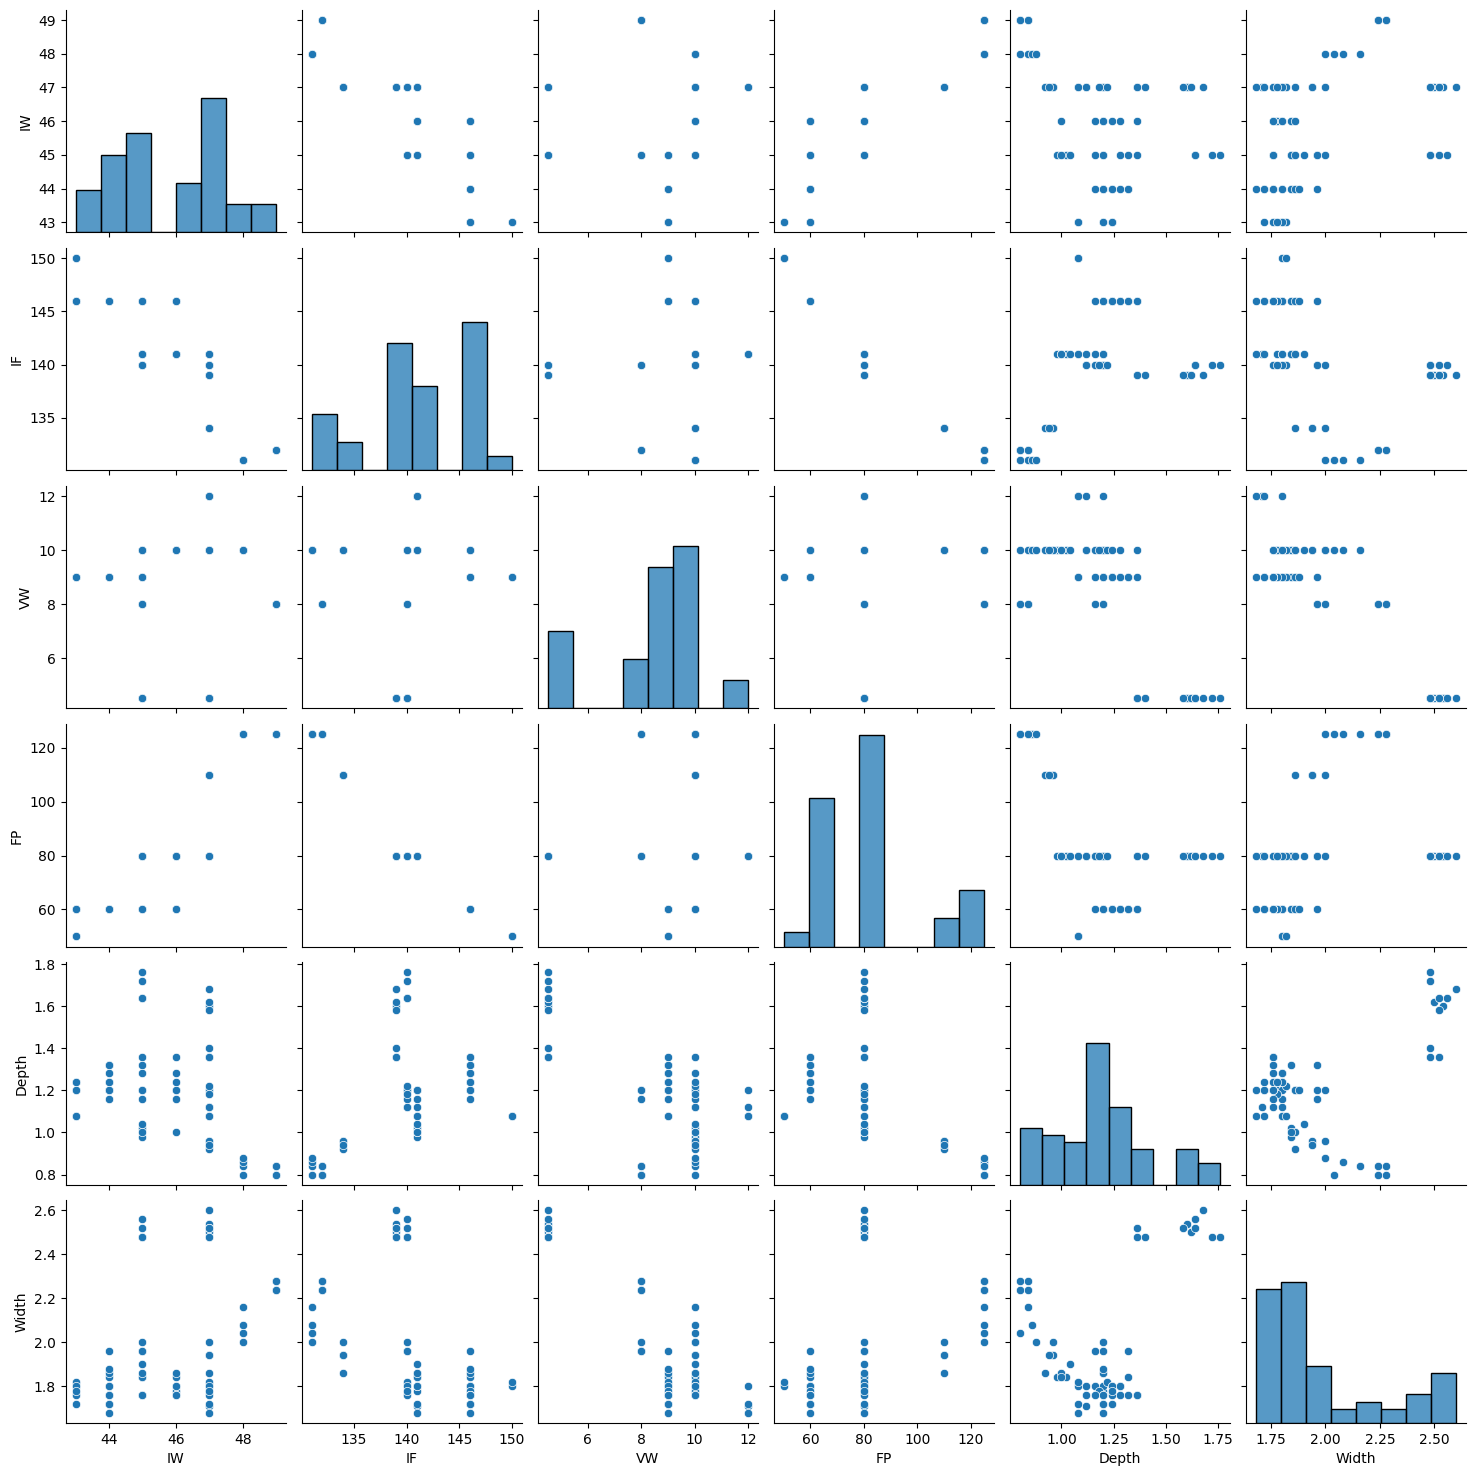

In [17]:
sns.pairplot(data_orig_deduplicated)

Корреляция данных

In [18]:
data_orig_deduplicated.corr().round(2)

,IW,IF,VW,FP,Depth,Width
IW,1.00,-0.86,-0.02,0.84,-0.34,0.41
IF,-0.86,1.00,0.09,-0.98,0.42,-0.49
VW,-0.02,0.09,1.00,0.02,-0.69,-0.87
FP,0.84,-0.98,0.02,1.00,-0.55,0.39
Depth,-0.34,0.42,-0.69,-0.55,1.00,0.43
Width,0.41,-0.49,-0.87,0.39,0.43,1.00


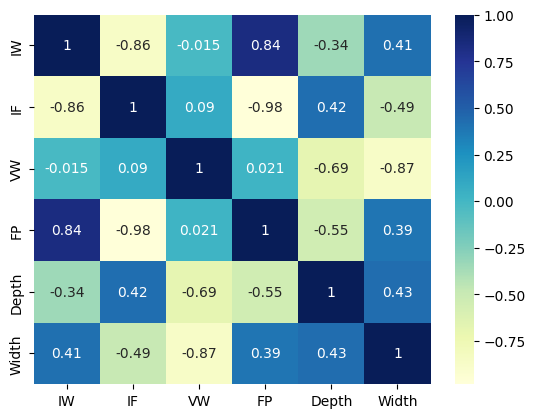

In [19]:
dataplot = sns.heatmap(data_orig_deduplicated.corr(), cmap='YlGnBu', annot = True)
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()

Анализ при помощи "ящика с усами"

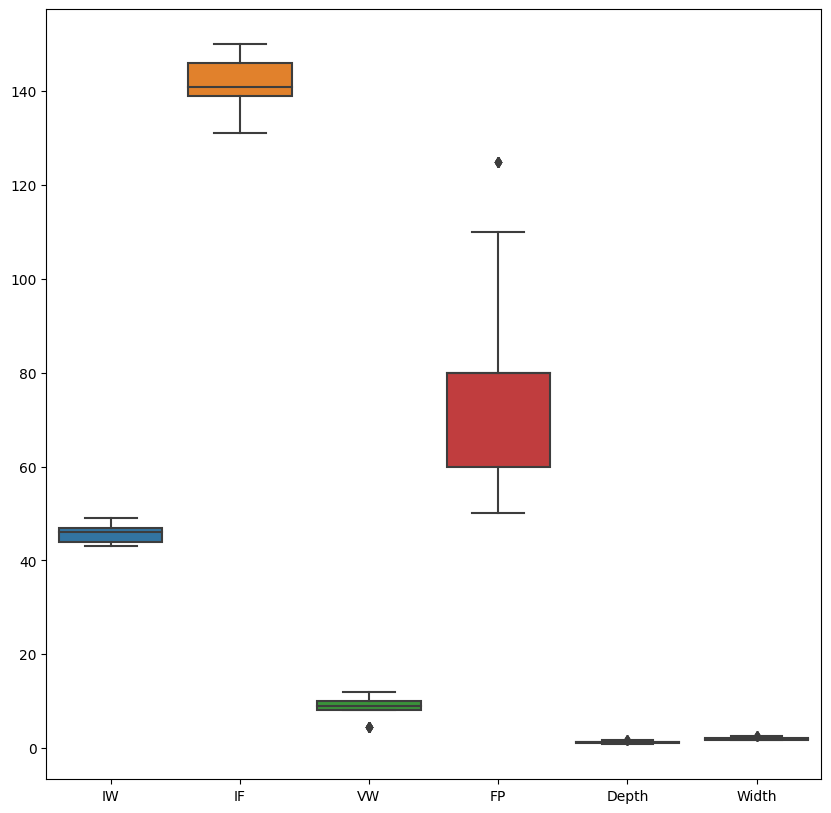

In [20]:
plt.figure(figsize=(10, 10))
sns.boxplot(data_orig_deduplicated)
plt.show()

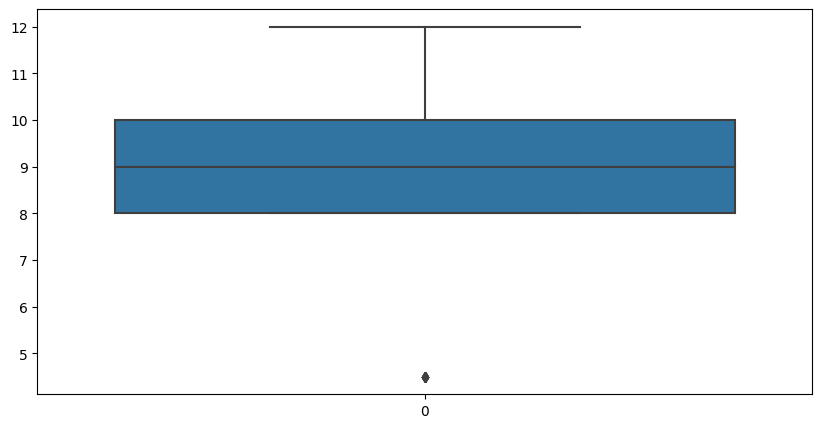

In [21]:
plt.figure(figsize=(10,5))
test = sns.boxplot(data_orig_deduplicated['VW'])
plt.show()

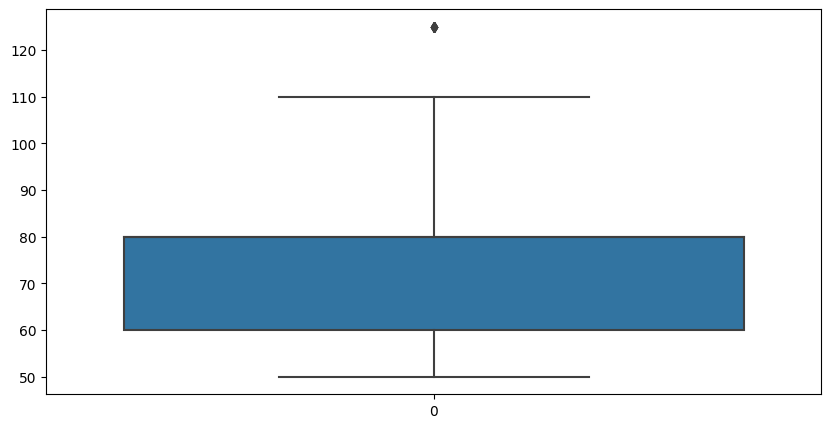

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data_orig_deduplicated['FP'])
plt.show()

Удаление выбросов при помощи квантилей

In [23]:
Q1VW = np.quantile(data_orig_deduplicated['VW'], 0.25)
Q3VW = np.quantile(data_orig_deduplicated['VW'], 0.75)
IQRVW = Q3VW - Q1VW
lowerVW = Q1VW - 1.5 * IQRVW
upperVW = Q3VW + 1.5 * IQRVW

Q1FP = np.quantile(data_orig_deduplicated['FP'], 0.25)
Q3FP = np.quantile(data_orig_deduplicated['FP'], 0.75)
IQRFP = Q3FP - Q1FP
lowerFP = Q1FP - 1.5 * IQRFP
upperFP = Q3FP + 1.5 * IQRFP

In [24]:
print(lowerVW, upperVW)

5.0 13.0


In [25]:
print(lowerFP, upperFP)

30.0 110.0


In [26]:
QVW = ((data_orig_deduplicated['VW'] > lowerVW) & (data_orig_deduplicated['VW'] < upperVW))
QFP = ((data_orig_deduplicated['FP'] > lowerFP) & (data_orig_deduplicated['FP'] < upperFP))

In [27]:
data_orig_drop = data_orig_deduplicated[QVW & QFP]

Проверка полученного после удаления выбросов датасета

In [28]:
data_orig_drop.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [29]:
data_orig_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 8 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      42 non-null     int64  
 1   IF      42 non-null     int64  
 2   VW      42 non-null     float64
 3   FP      42 non-null     int64  
 4   Depth   42 non-null     float64
 5   Width   42 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.3 KB


In [30]:
data_orig_drop['VW'].value_counts()

9.0     20
10.0    15
12.0     4
8.0      3
Name: VW, dtype: int64

Костыль для исправления ошибки с индексами

In [31]:
data_orig_drop.reset_index(inplace=True)

In [32]:
data_orig_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   42 non-null     int64  
 1   IW      42 non-null     int64  
 2   IF      42 non-null     int64  
 3   VW      42 non-null     float64
 4   FP      42 non-null     int64  
 5   Depth   42 non-null     float64
 6   Width   42 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


Проверка, что выбросы удалены

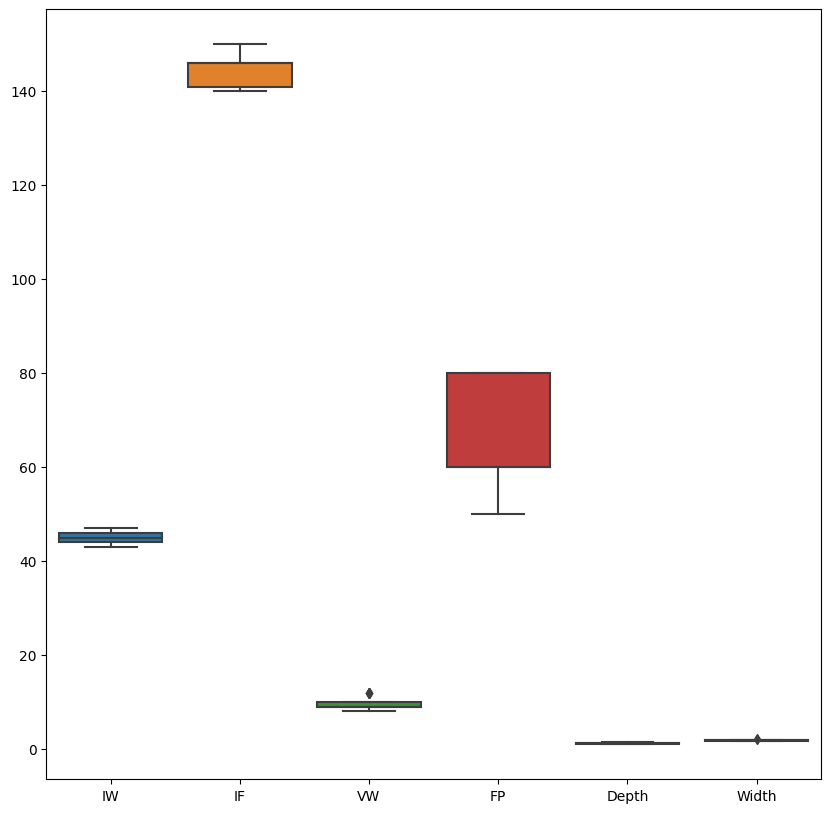

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(data_orig_drop[['IW', 'IF', 'VW', 'FP', 'Depth', 'Width']])
plt.show()

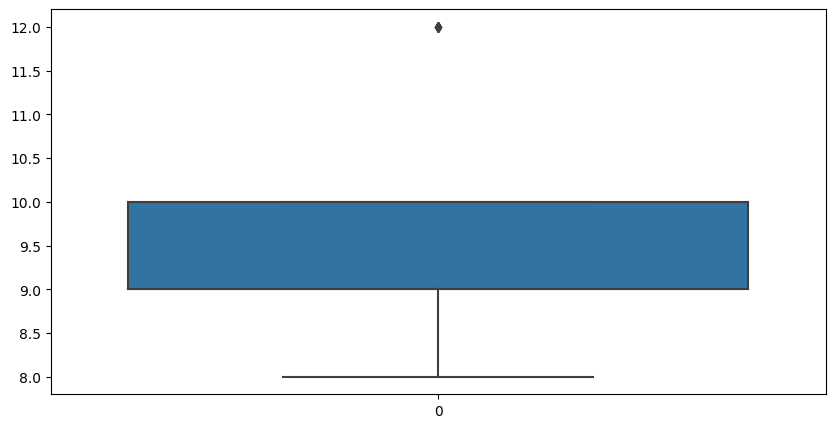

In [34]:
plt.figure(figsize=(10,5))
test = sns.boxplot(data_orig_drop['VW'])
plt.show()

Дальнейшее удаление выбросов

In [35]:
Q1VW = np.quantile(data_orig_drop['VW'], 0.25)
Q3VW = np.quantile(data_orig_drop['VW'], 0.75)
IQRVW = Q3VW - Q1VW
lowerVW = Q1VW - 1.5 * IQRVW
upperVW = Q3VW + 1.5 * IQRVW

In [36]:
print(lowerVW, upperVW)

7.5 11.5


In [37]:
QVW = ((data_orig_drop['VW'] > lowerVW) & (data_orig_drop['VW'] < upperVW))

In [38]:
data_orig_drop = data_orig_drop[QVW]

In [39]:
data_orig_drop.reset_index(inplace=True)

In [40]:
data_orig_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  38 non-null     int64  
 1   index    38 non-null     int64  
 2   IW       38 non-null     int64  
 3   IF       38 non-null     int64  
 4   VW       38 non-null     float64
 5   FP       38 non-null     int64  
 6   Depth    38 non-null     float64
 7   Width    38 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 2.5 KB


Оценка 

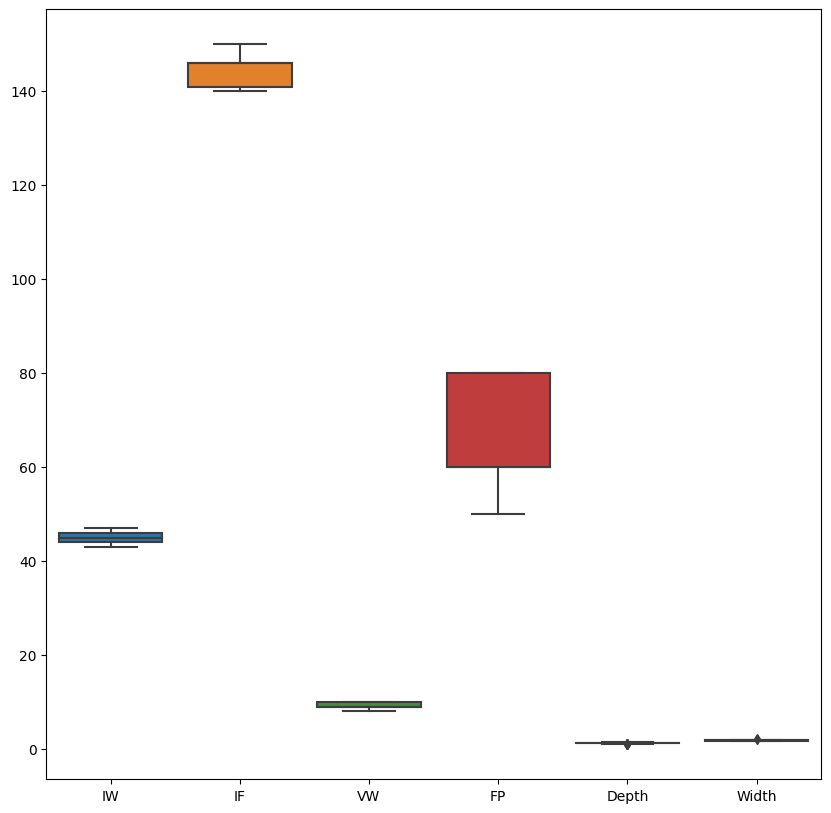

In [41]:
plt.figure(figsize=(10, 10))
sns.boxplot(data_orig_drop[['IW', 'IF', 'VW', 'FP', 'Depth', 'Width']])
plt.show()

Анализ данных без выбросов

Удаления столбцов с индексами

In [42]:
data_orig_drop.drop(columns=['index', 'level_0'], axis=1, inplace=True)

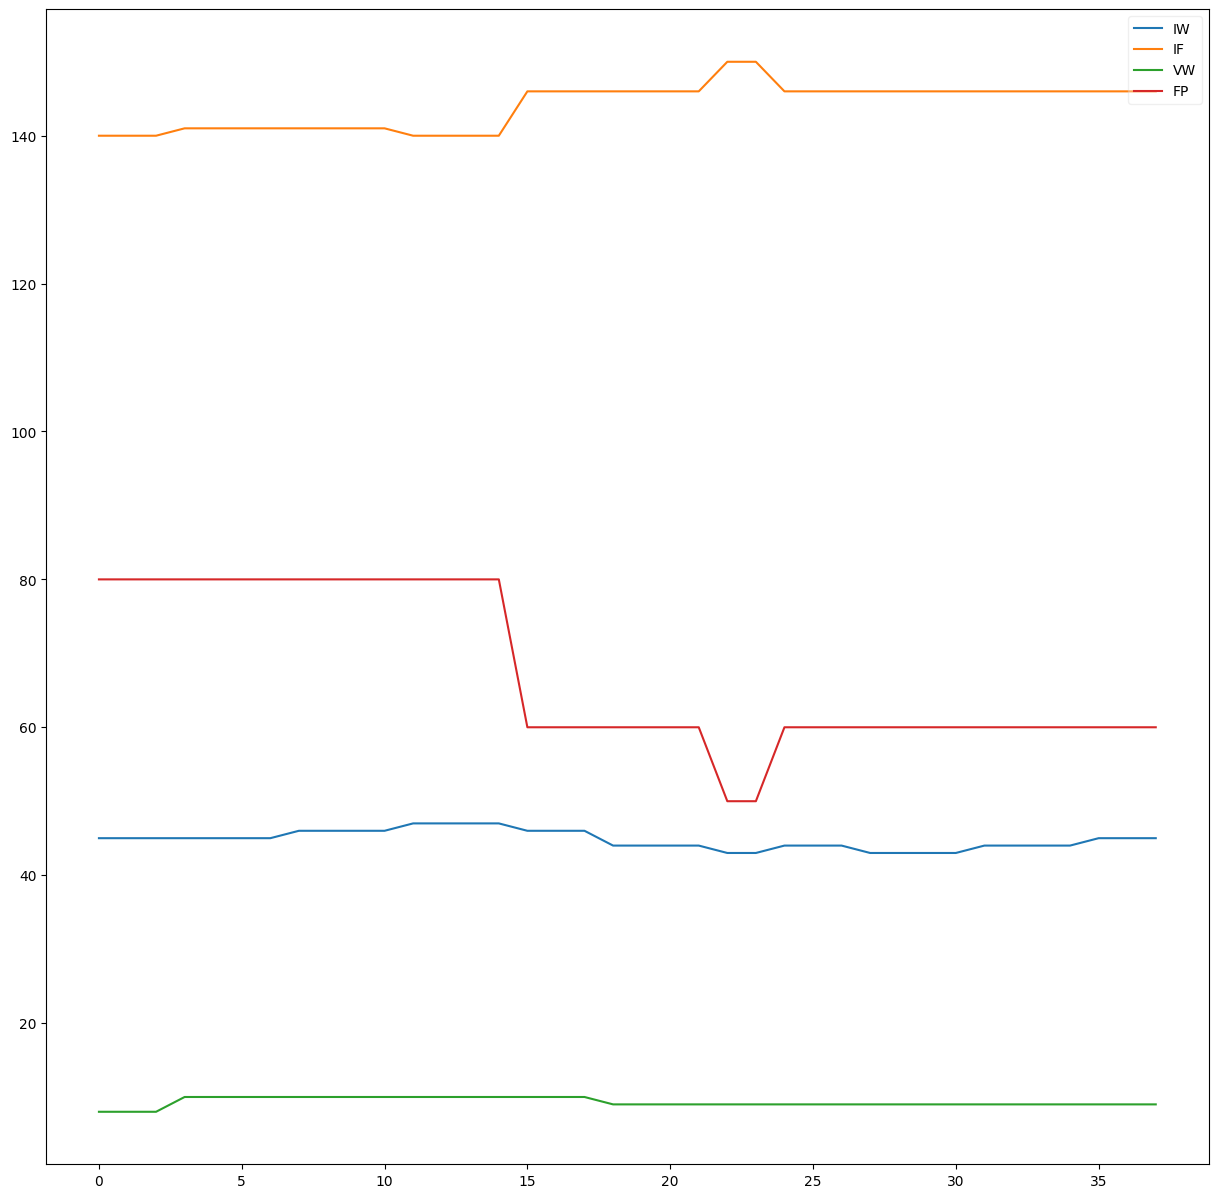

In [43]:
data_orig_drop[['IW', 'IF', 'VW', 'FP']].plot()
plt.legend(loc='upper right', framealpha=0.3)

Описательная статистика

In [44]:
data_orig_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,38.0,44.789474,1.233713,43.00,44.00,45.0,46.00,47.00
IF,38.0,144.052632,3.030898,140.00,141.00,146.0,146.00,150.00
VW,38.0,9.315789,0.619732,8.00,9.00,9.0,10.00,10.00
FP,38.0,67.368421,10.573861,50.00,60.00,60.0,80.00,80.00
Depth,38.0,1.190526,0.097508,0.98,1.16,1.2,1.24,1.36
Width,38.0,1.812105,0.072565,1.68,1.76,1.8,1.84,2.00


Попарные графики и гистограммы данных

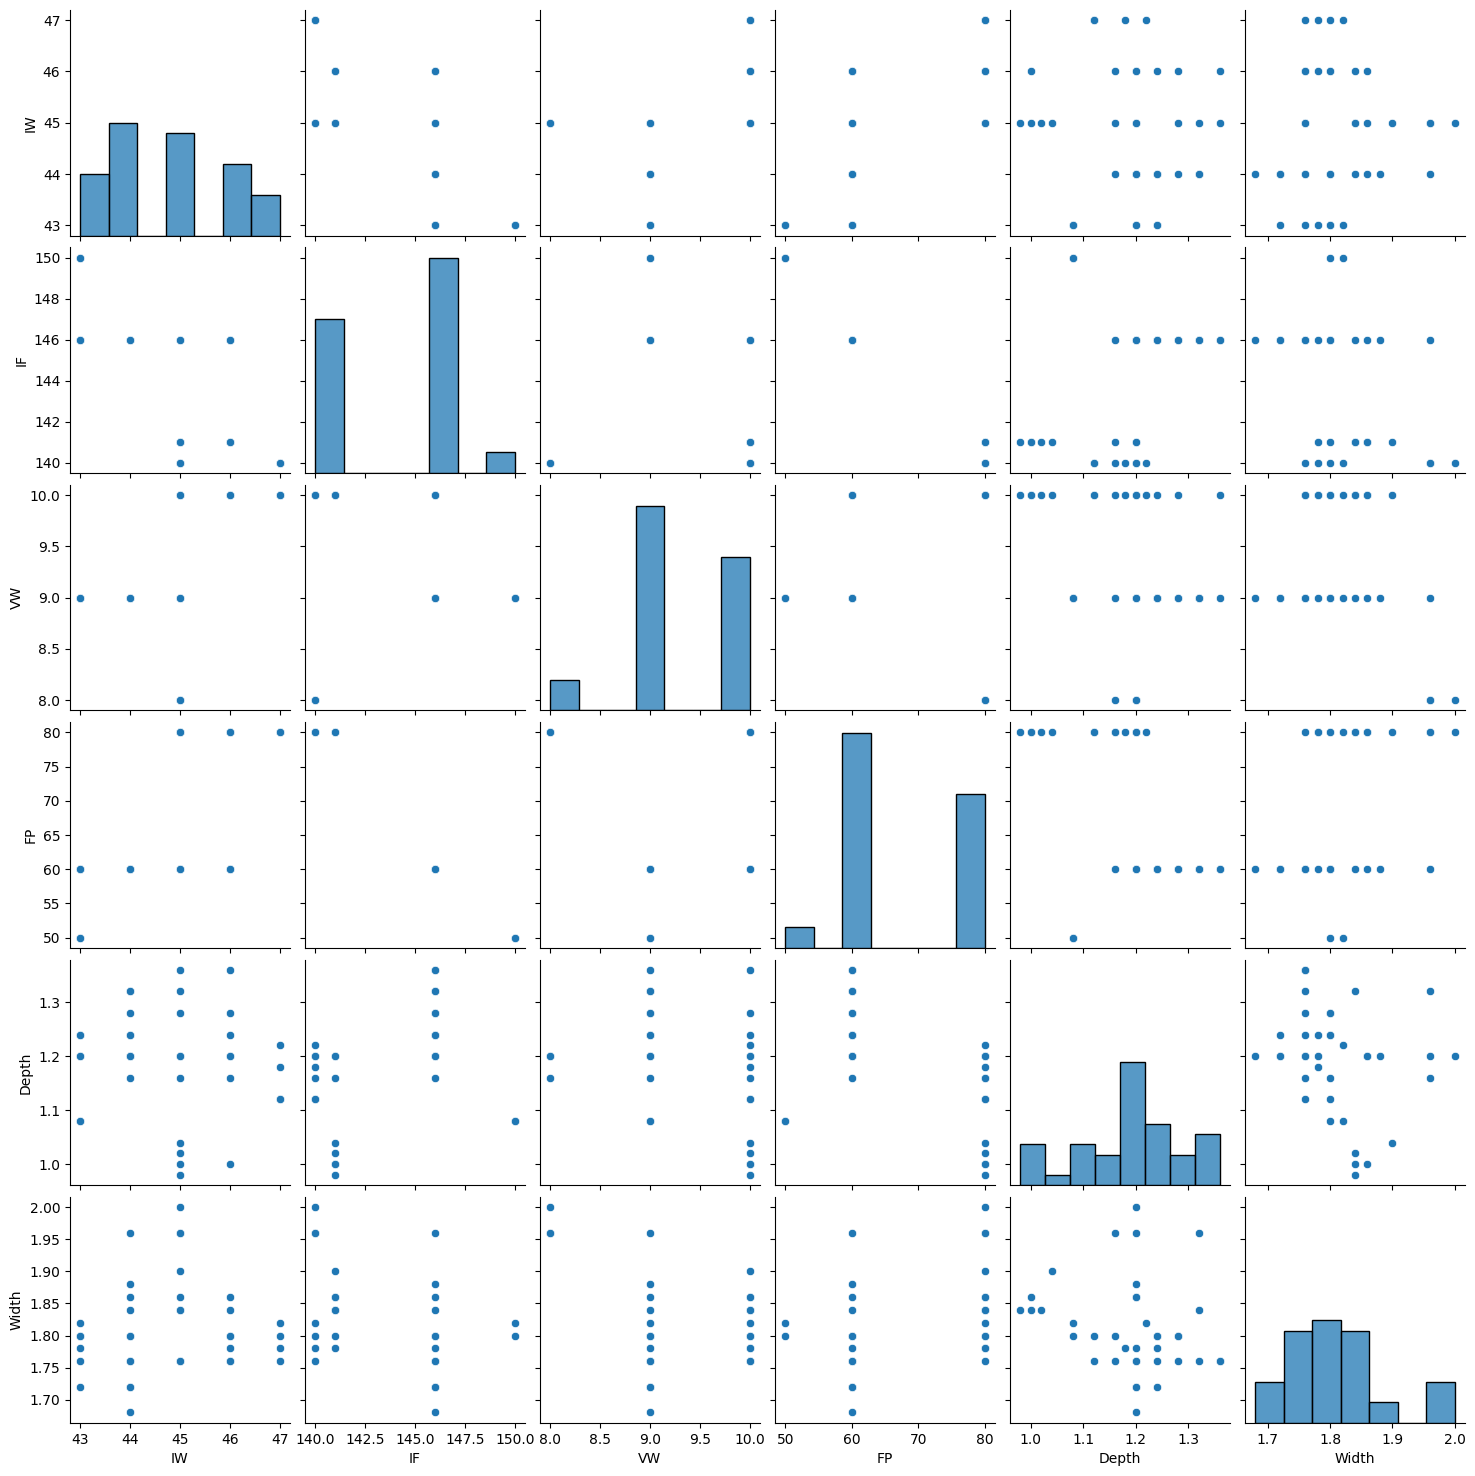

In [45]:
sns.pairplot(data_orig_drop)

Оценка плотности ядра

<AxesSubplot: ylabel='Density'>

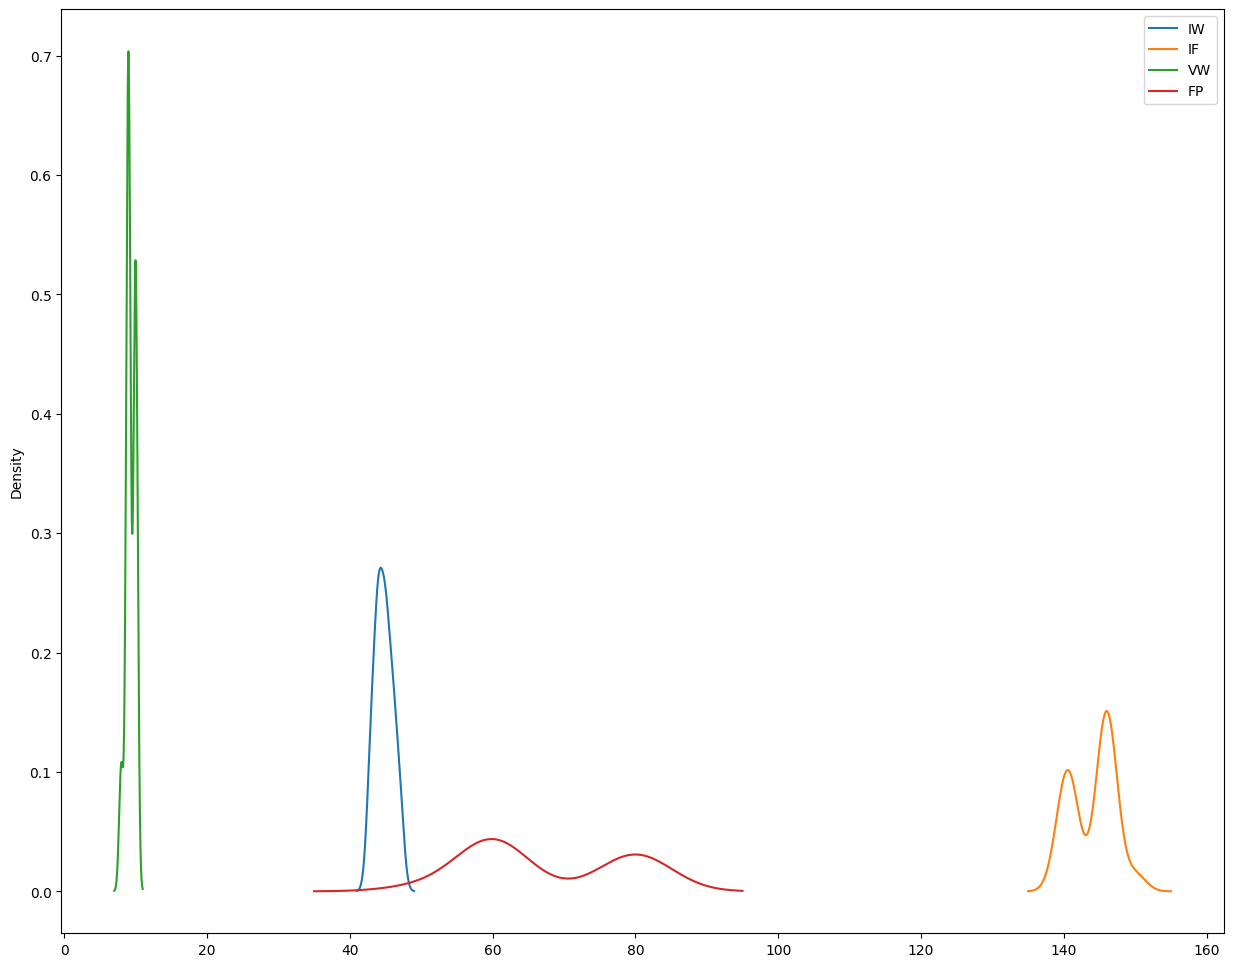

In [46]:
_, ax = plt.subplots(figsize=(15, 12))
data_orig_drop[['IW', 'IF', 'VW', 'FP']].plot(kind='kde', ax=ax)

Построение и обучение моделей. Нормализация

In [47]:
x_columns = ['IW', 'IF', 'VW', 'FP']
y_columns = ['Depth', 'Width']

Разделение на целевые переменные и атрибуты

In [48]:
X = pd.DataFrame(data_orig_drop, columns = x_columns)
y = pd.DataFrame(data_orig_drop, columns = y_columns)

In [49]:
X.head()

,IW,IF,VW,FP
0,45,140,8.0,80
1,45,140,8.0,80
2,45,140,8.0,80
3,45,141,10.0,80
4,45,141,10.0,80


In [50]:
y.head()

,Depth,Width
0,1.20,2.00
1,1.20,1.96
2,1.16,1.96
3,0.98,1.84
4,1.02,1.84


Нормализация

In [51]:
minmax_scaler = MinMaxScaler()

In [52]:
data_x_norm = minmax_scaler.fit_transform(np.array(X[['IW', 'IF', 'VW', 'FP']]))

In [53]:
data_norm_x_df = pd.DataFrame(data = data_x_norm, columns = ['IW', 'IF', 'VW', 'FP'])

In [54]:
data_norm_x_df.head()

,IW,IF,VW,FP
0,0.5,0.0,0.0,1.0
1,0.5,0.0,0.0,1.0
2,0.5,0.0,0.0,1.0
3,0.5,0.1,1.0,1.0
4,0.5,0.1,1.0,1.0


In [55]:
data_norm_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      38 non-null     float64
 1   IF      38 non-null     float64
 2   VW      38 non-null     float64
 3   FP      38 non-null     float64
dtypes: float64(4)
memory usage: 1.3 KB


In [56]:
data_norm_x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,38.0,0.447368,0.308428,0.0,0.250000,0.500000,0.75,1.0
IF,38.0,0.405263,0.303090,0.0,0.100000,0.600000,0.60,1.0
VW,38.0,0.657895,0.309866,0.0,0.500000,0.500000,1.00,1.0
FP,38.0,0.578947,0.352462,0.0,0.333333,0.333333,1.00,1.0


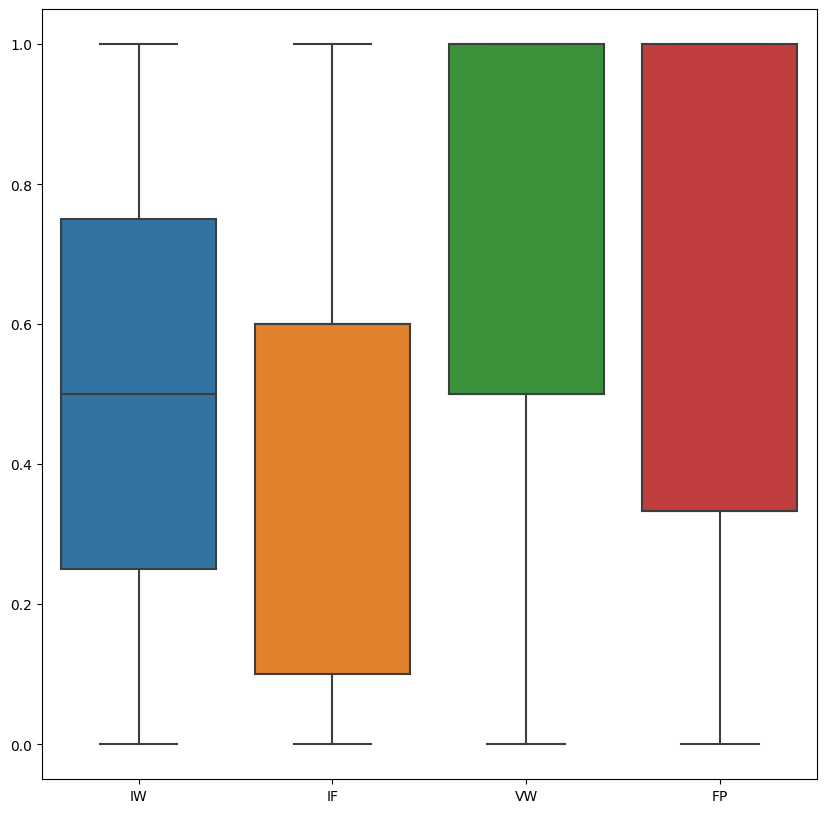

In [57]:
plt.figure(figsize=(10, 10))
sns.boxplot(data_norm_x_df)
plt.show()

In [58]:
print(data_norm_x_df['IW'].unique())
print(data_norm_x_df['IF'].unique())
print(data_norm_x_df['VW'].unique())
print(data_norm_x_df['FP'].unique())

[0.5  0.75 1.   0.25 0.  ]
[0.  0.1 0.6 1. ]
[0.  1.  0.5]
[1.         0.33333333 0.        ]


Плотность ядер после нормализации

<AxesSubplot: ylabel='Density'>

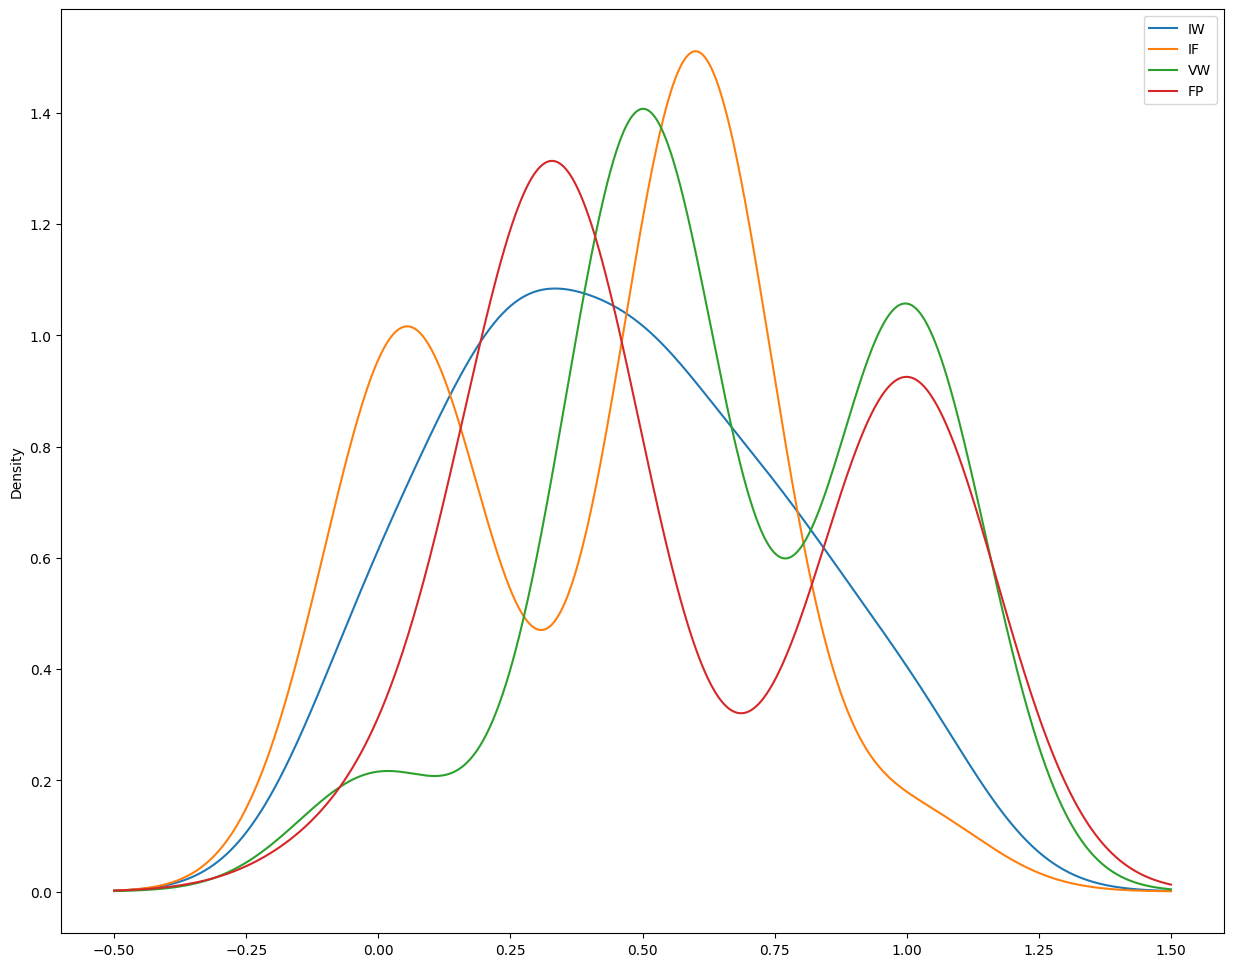

In [59]:
_, ax = plt.subplots(figsize=(15, 12))
data_norm_x_df[['IW', 'IF', 'VW', 'FP']].plot(kind='kde', ax=ax)

Разделение датасета на обучающую и тренировочную выборки

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data_norm_x_df, y, train_size = 0.8, random_state=42)

Проверка размерностей

In [61]:
print(X_train.shape, y_train.shape)

(30, 4) (30, 2)


In [62]:
print(X_test.shape, y_test.shape)

(8, 4) (8, 2)


Построение нейросети

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Входной размер

In [64]:
n_features = data_norm_x_df.shape[1]

Построение модели и обучение

In [65]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (n_features,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='accuracy')

history = model.fit(X_train, y_train,
                    epochs=70,
                    batch_size=7,
                    verbose=1,
                    validation_split=0.1
                    )
print(history.history['accuracy'])

Epoch 1/70
4/4 [==============================] - 1s 68ms/step - loss: 2.1306 - accuracy: 0.0000e+00 - val_loss: 1.8173 - val_accuracy: 0.0000e+00
Epoch 2/70
4/4 [==============================] - 0s 11ms/step - loss: 1.8688 - accuracy: 0.4074 - val_loss: 1.5463 - val_accuracy: 0.6667
Epoch 3/70
4/4 [==============================] - 0s 15ms/step - loss: 1.6080 - accuracy: 0.8148 - val_loss: 1.2651 - val_accuracy: 1.0000
Epoch 4/70
4/4 [==============================] - 0s 11ms/step - loss: 1.3248 - accuracy: 0.9259 - val_loss: 0.9569 - val_accuracy: 1.0000
Epoch 5/70
4/4 [==============================] - 0s 11ms/step - loss: 1.0154 - accuracy: 1.0000 - val_loss: 0.6280 - val_accuracy: 1.0000
Epoch 6/70
4/4 [==============================] - 0s 11ms/step - loss: 0.6913 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 1.0000
Epoch 7/70
4/4 [==============================] - 0s 11ms/step - loss: 0.3922 - accuracy: 1.0000 - val_loss: 0.1226 - val_accuracy: 1.0000
Epoch 8/70
4/4 [===

Визуализация потери и точности

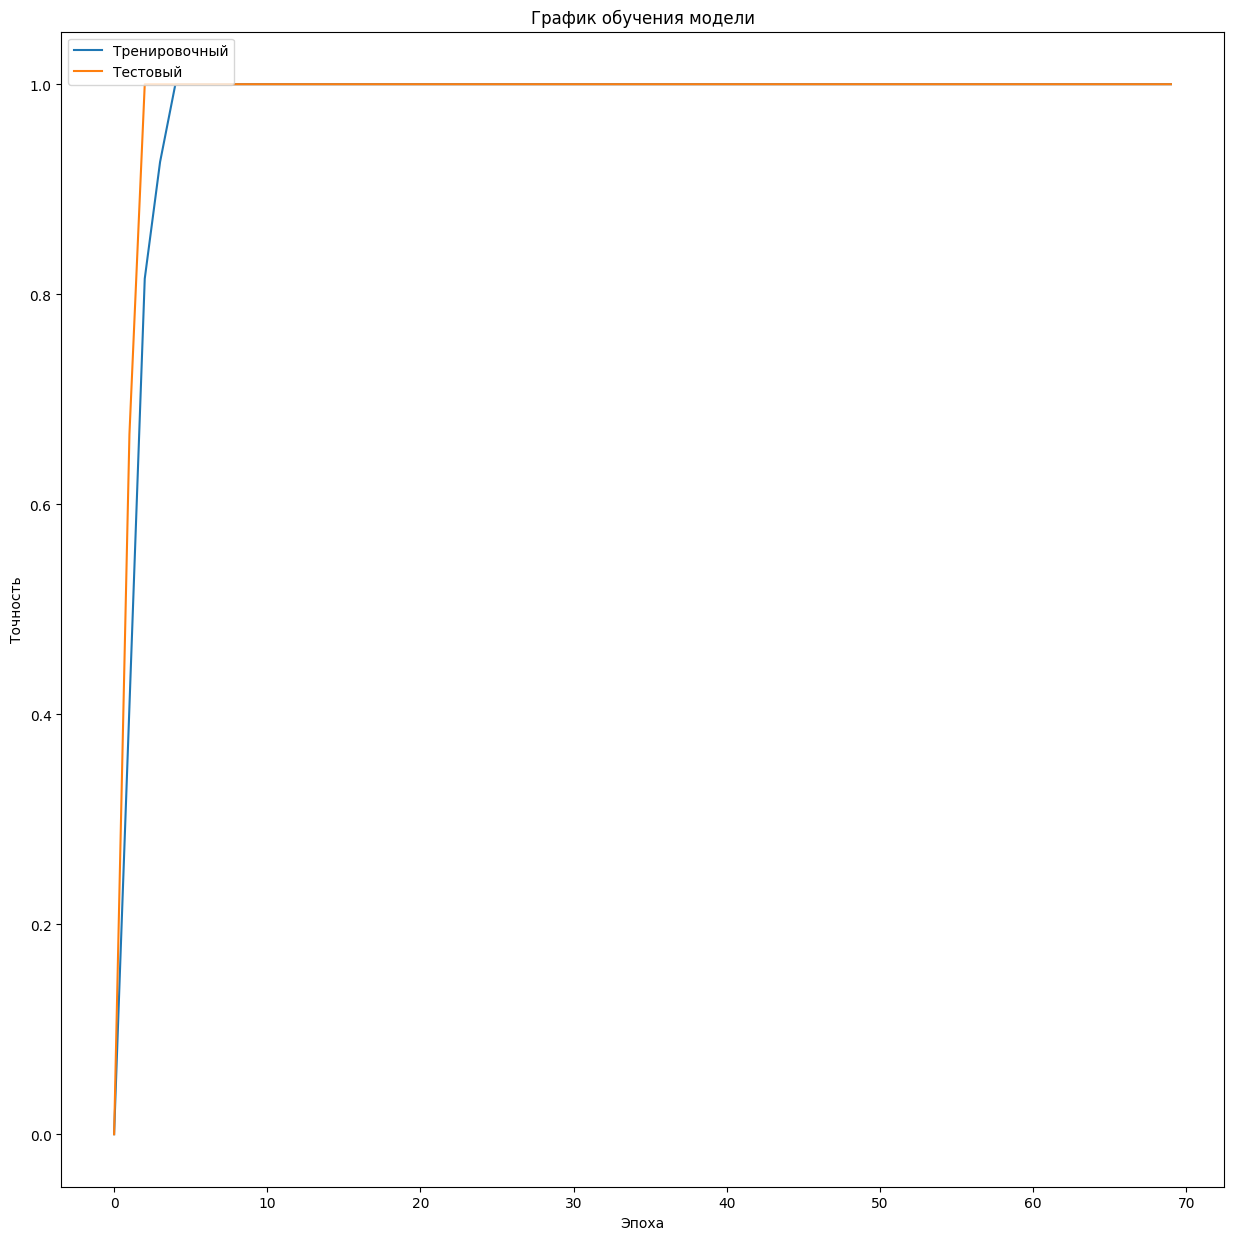

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('График обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Тренировочный', 'Тестовый'], loc='upper left')
plt.show()

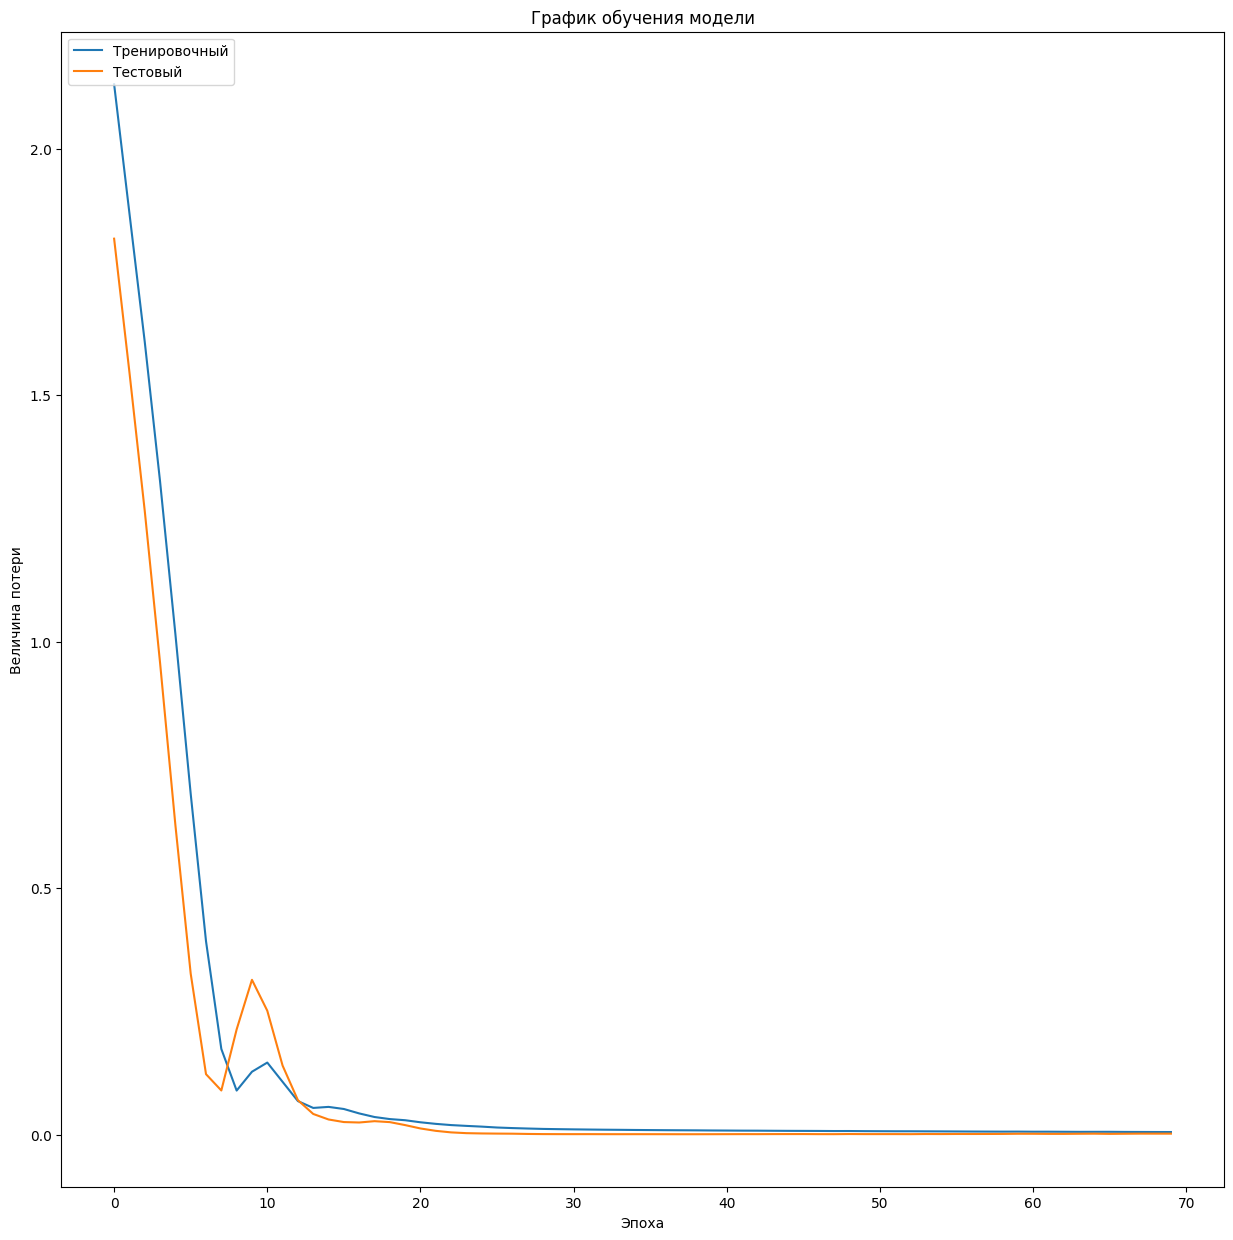

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('Величина потери')
plt.legend(['Тренировочный', 'Тестовый'], loc='upper left')
plt.show()

Оценка модели

In [68]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - accuracy: 1.0000


[0.00428275391459465, 1.0]

Модель линейной регрессии

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model2 = LinearRegression()

model2.fit(X_train, y_train)

LinearRegression()

In [71]:
model2.score(X_test, y_test)

0.492519667533658

In [72]:
y_pred = model2.predict(X_test)

print(y_pred[:3])

[[1.23371816 1.79627396]
 [1.27760702 1.80819266]
 [1.04500289 1.83004937]]


Оценка модели

In [73]:
from sklearn import metrics

print('Среднеквадратическая ошибка (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))

Среднеквадратическая ошибка (RMSE): 0.05


In [74]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.49


Дерево решений для регрессии

In [75]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
model3.score(X_test, y_test)

0.6103847530671582

In [77]:
y_pred2 = model3.predict(X_test)
print(y_pred[:3])

[[1.23371816 1.79627396]
 [1.27760702 1.80819266]
 [1.04500289 1.83004937]]


Оценка модели

In [78]:
print('Среднеквадратическая ошибка (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)).round(2))

Среднеквадратическая ошибка (RMSE): 0.04


In [79]:
print('R2:', np.round(metrics.r2_score(y_test,y_pred2), 2))

R2: 0.61


In [80]:
from sklearn.linear_model import MultiTaskLassoCV

Модель LASSO

In [81]:

model4 = MultiTaskLassoCV()
model4.fit(X_train, y_train)

MultiTaskLassoCV()

In [82]:
model4.score(X_test, y_test)

0.4923342592527385

In [83]:
y_pred3 = model4.predict(X_test)

Оценка модели

In [84]:
print('Среднеквадратическая ошибка (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)).round(2))

Среднеквадратическая ошибка (RMSE): 0.05


In [85]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred3), 2))

R2: 0.49


Вывод: после удаления выбросов модели показывает невысокую точность. Проведем анализ на данных без удаления выбросов, но без дубликатов

In [90]:
x_columns = ['IW', 'IF', 'VW', 'FP']
y_columns = ['Depth', 'Width']
X2 = pd.DataFrame(data_orig_deduplicated, columns = x_columns)
y2 = pd.DataFrame(data_orig_deduplicated , columns = y_columns)

In [91]:
X2.head()

,IW,IF,VW,FP
0,47,139,4.5,80
1,47,139,4.5,80
2,47,139,4.5,80
3,47,139,4.5,80
4,45,140,4.5,80


In [92]:
y2.head()

,Depth,Width
0,1.60,2.54
1,1.62,2.50
2,1.68,2.60
3,1.58,2.52
4,1.76,2.48


In [93]:
minmax_scaler2 = MinMaxScaler()
data_x_norm2 = minmax_scaler2.fit_transform(np.array(X2[['IW', 'IF', 'VW', 'FP']]))
data_norm_x_df2 = pd.DataFrame(data = data_x_norm2, columns = ['IW', 'IF', 'VW', 'FP'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_norm_x_df2, y2, train_size = 0.8, random_state=42)

In [94]:
X_train2.head()

,IW,IF,VW,FP
13,0.333333,0.526316,0.733333,0.4
34,1.000000,0.052632,0.466667,1.0
25,0.666667,0.157895,0.733333,0.8
3,0.666667,0.421053,0.000000,0.4
17,0.500000,0.526316,0.733333,0.4


Модели

Нейронная сеть

In [95]:
n_features2 = data_norm_x_df2.shape[1]

In [96]:
modelnn = Sequential()

modelnn.add(Dense(64, activation = 'relu', input_shape = (n_features2,)))
modelnn.add(Dense(64, activation = 'relu'))
modelnn.add(Dense(32, activation = 'relu'))
modelnn.add(Dense(16, activation = 'relu'))
modelnn.add(Dense(2, activation = 'relu'))

modelnn.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='accuracy')

history2 = modelnn.fit(X_train2, y_train2,
                    epochs=70,
                    batch_size=7,
                    verbose=1,
                    validation_split=0.1
                    )
print(history2.history['accuracy'])

Epoch 1/70
7/7 [==============================] - 1s 33ms/step - loss: 2.5481 - accuracy: 0.0000e+00 - val_loss: 2.6130 - val_accuracy: 0.0000e+00
Epoch 2/70
7/7 [==============================] - 0s 8ms/step - loss: 2.2383 - accuracy: 0.0000e+00 - val_loss: 2.2173 - val_accuracy: 0.0000e+00
Epoch 3/70
7/7 [==============================] - 0s 8ms/step - loss: 1.8175 - accuracy: 0.0000e+00 - val_loss: 1.7523 - val_accuracy: 0.0000e+00
Epoch 4/70
7/7 [==============================] - 0s 9ms/step - loss: 1.3419 - accuracy: 0.0000e+00 - val_loss: 1.2191 - val_accuracy: 0.0000e+00
Epoch 5/70
7/7 [==============================] - 0s 7ms/step - loss: 0.8553 - accuracy: 0.0000e+00 - val_loss: 0.7414 - val_accuracy: 0.0000e+00
Epoch 6/70
7/7 [==============================] - 0s 8ms/step - loss: 0.4990 - accuracy: 0.0000e+00 - val_loss: 0.4029 - val_accuracy: 0.3333
Epoch 7/70
7/7 [==============================] - 0s 8ms/step - loss: 0.2336 - accuracy: 0.9348 - val_loss: 0.2296 - val_accura

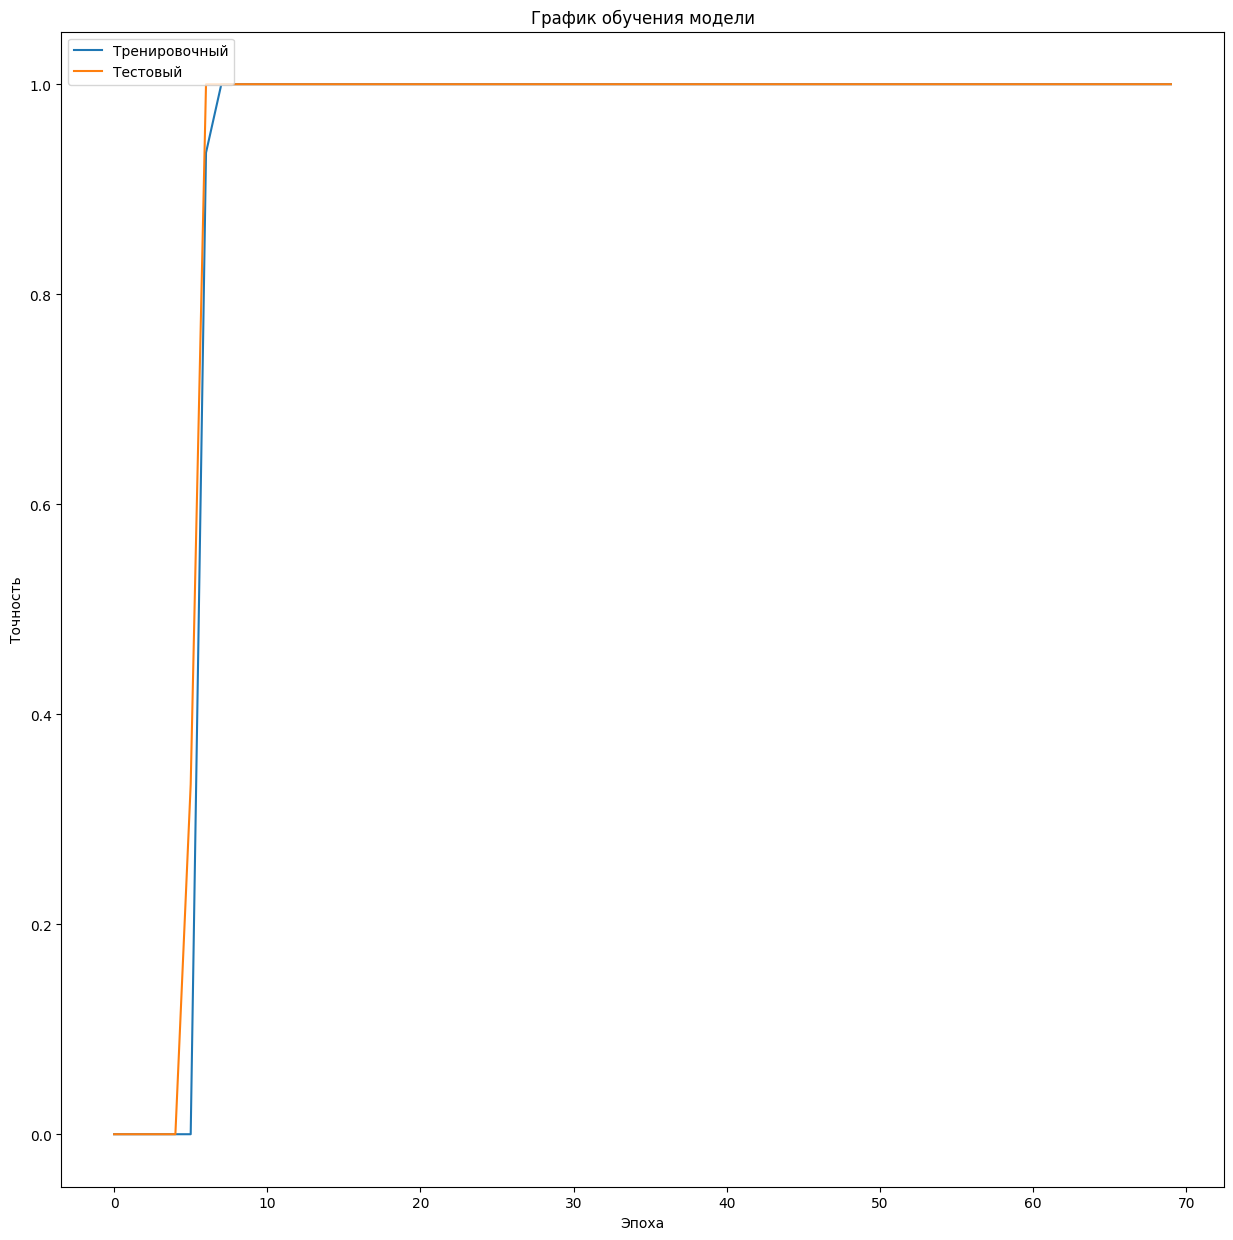

In [97]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('График обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Тренировочный', 'Тестовый'], loc='upper left')
plt.show()

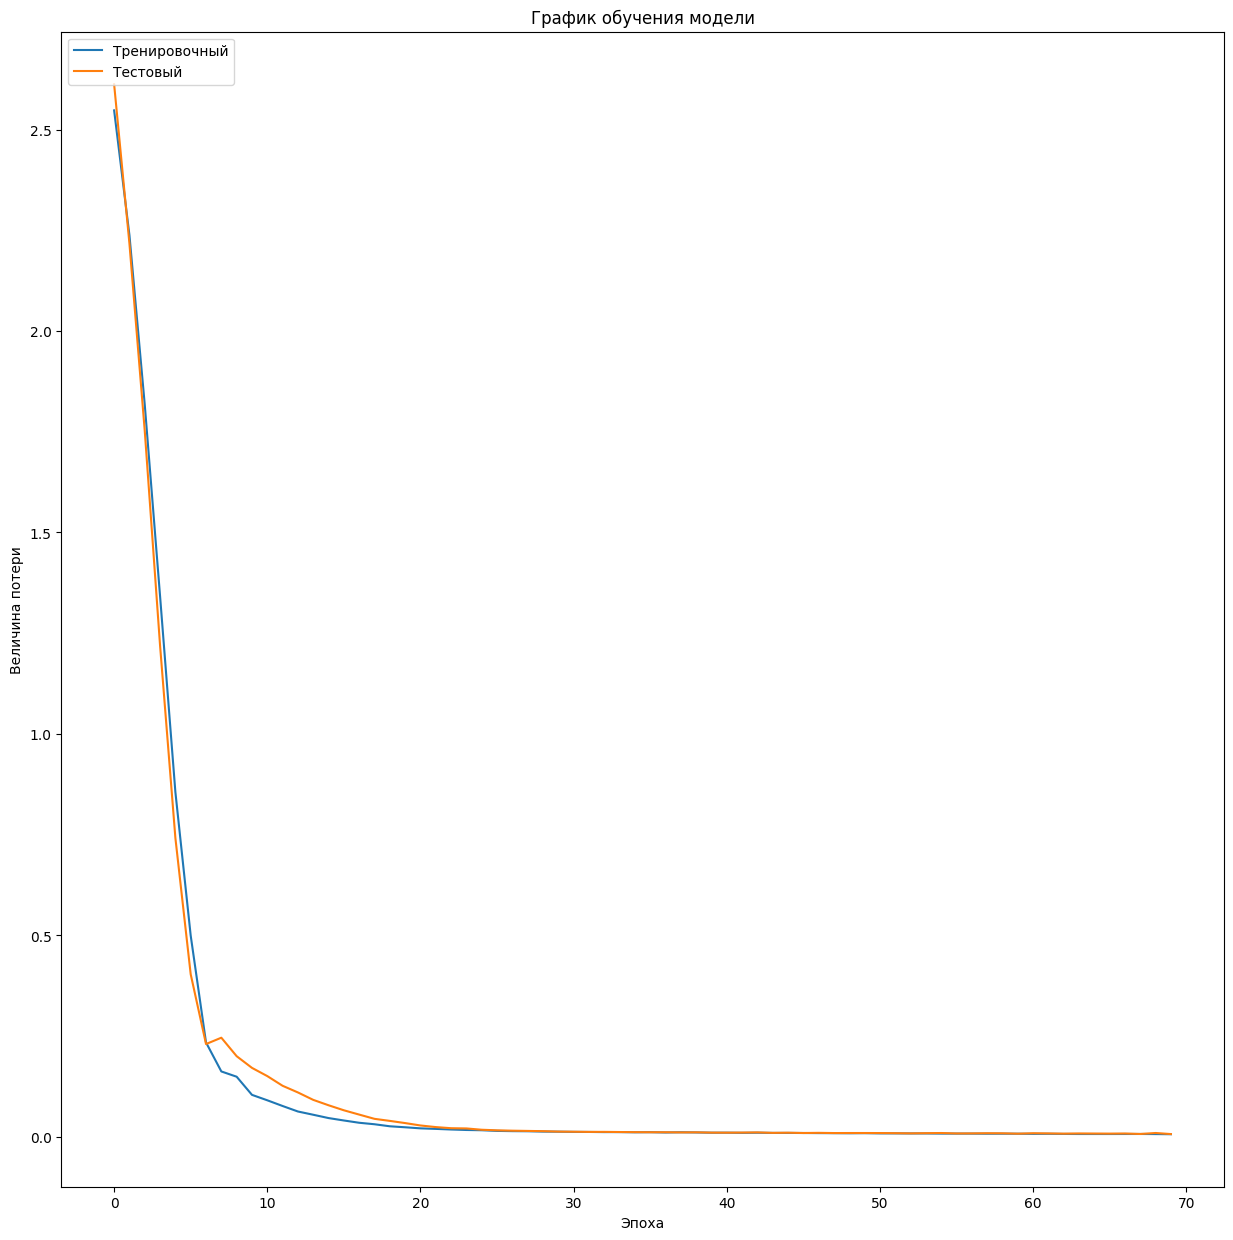

In [98]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('График обучения модели')
plt.xlabel('Эпоха')
plt.ylabel('Величина потери')
plt.legend(['Тренировочный', 'Тестовый'], loc='upper left')
plt.show()

In [99]:
modelnn.evaluate(X_test2, y_test2)

1/1 [==============================] - 0s 34ms/step - loss: 0.0049 - accuracy: 1.0000


[0.004914811812341213, 1.0]

Линейная регрессия

In [103]:
model2_2 = LinearRegression()
model2_2.fit(X_train2, y_train2)
model2_2.score(X_test2, y_test2)

0.8917284859665568

In [104]:
y_pred2_2 = model2_2.predict(X_test2)
print(y_pred2_2[:3])

[[1.24762765 1.82465257]
 [1.24762765 1.82465257]
 [1.56594552 2.51084298]]


In [107]:
print('Среднеквадратическая ошибка (RMSE):', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2_2)).round(2))
print('R2:', np.round(metrics.r2_score(y_test2, y_pred2_2), 2))

Среднеквадратическая ошибка (RMSE): 0.08
R2: 0.89


Дерево решений для регрессии

In [108]:
from sklearn.tree import DecisionTreeRegressor
model3_2 = DecisionTreeRegressor()
model3_2.fit(X_train2, y_train2)
model3_2.score(X_test2, y_test2)

0.9425632997109102

In [109]:
y_pred3_2 = model3_2.predict(X_test2)
print(y_pred3_2[:3])

[[1.23428571 1.80857143]
 [1.23428571 1.80857143]
 [1.5        2.51666667]]


In [110]:
print('Среднеквадратическая ошибка (RMSE):', np.sqrt(metrics.mean_squared_error(y_test2, y_pred3_2)).round(2))
print('R2:', np.round(metrics.r2_score(y_test2, y_pred3_2), 2))

Среднеквадратическая ошибка (RMSE): 0.06
R2: 0.94


Модель LASSO

In [113]:
model4_2 = MultiTaskLassoCV()
model4_2.fit(X_train2, y_train2)
model4_2.score(X_test2, y_test2)

0.8925791075702763

In [114]:
y_pred4_2 = model4_2.predict(X_test2)
print(y_pred4_2[:3])

[[1.24886584 1.82480972]
 [1.24886584 1.82480972]
 [1.56265618 2.5100591 ]]


In [115]:
print('Среднеквадратическая ошибка (RMSE):', np.sqrt(metrics.mean_squared_error(y_test2, y_pred4_2)).round(2))
print('R2:', np.round(metrics.r2_score(y_test2, y_pred4_2), 2))

Среднеквадратическая ошибка (RMSE): 0.08
R2: 0.89


Вывод: модели обученные на данных без удаления выбросов имеют метрики лучше, чем у моделей, обученных на данных с удалением выбросов.

# Сохранение моделей

Сохраним модели, обученные на данных без удаления выбросов

In [118]:
modelnn.save('nn')

INFO:tensorflow:Assets written to: nn\assets


INFO:tensorflow:Assets written to: nn\assets


In [122]:
import pickle

In [127]:
pickle.dump(model2_2, open('LinearRegression.pkl', 'wb+'))
pickle.dump(model3_2, open('DecisionTreeRegressor.pkl', 'wb+'))
pickle.dump(model4_2, open('MultiTaskLassoCV.pkl', 'wb+'))

Сохранение minmaxscaler'а для использования в веб приложении

In [200]:
dump(minmax_scaler2, 'minmaxscaler.joblib')

['minmaxscaler.joblib']